In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [19]:
dataset = pd.read_csv("C:/Users/user/Downloads/abalone.data", names = ["Sex", "Length", "Diameter", "Height","Whole weight",
                                                                       "Shucked weight", "Viscera weight", "Shell weight", "Rings"])
dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [20]:
dataset.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

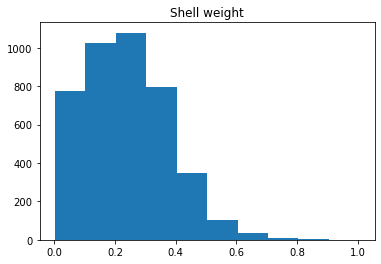

In [21]:
dataset.describe()
plt.hist(dataset['Shell weight'])
plt.title('Shell weight')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
dataset["Sex"]=encoder.fit_transform(dataset["Sex"])

In [25]:
dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [26]:
X1=dataset.drop(["Whole weight", "Shucked weight", "Viscera weight", "Shell weight"],axis=1)

In [27]:
Y1=dataset['Shell weight']

In [28]:
X1

,Sex,Length,Diameter,Height,Rings
0,2,0.455,0.365,0.095,15
1,2,0.350,0.265,0.090,7
2,0,0.530,0.420,0.135,9
3,2,0.440,0.365,0.125,10
4,1,0.330,0.255,0.080,7
...,...,...,...,...,...
4172,0,0.565,0.450,0.165,11
4173,2,0.590,0.440,0.135,10
4174,2,0.600,0.475,0.205,9
4175,0,0.625,0.485,0.150,10


In [29]:
Y1

0       0.1500
1       0.0700
2       0.2100
3       0.1550
4       0.0550
         ...  
4172    0.2490
4173    0.2605
4174    0.3080
4175    0.2960
4176    0.4950
Name: Shell weight, Length: 4177, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,test_size=0.25,random_state=42)

In [31]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (5,)))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                192       
                                                                 
 dense_6 (Dense)             (None, 20)                660       
                                                                 
 dense_7 (Dense)             (None, 16)                336       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,477
Trainable params: 1,477
Non-trainable params: 0
_________________________________________________________________


In [33]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
98/98 [==============================] - 1s 3ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 8/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0070 - m

98/98 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 64/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 65/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 66/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 67/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 68/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 69/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 70/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0

In [34]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017


[0.0017017727950587869, 0.0017017727950587869]

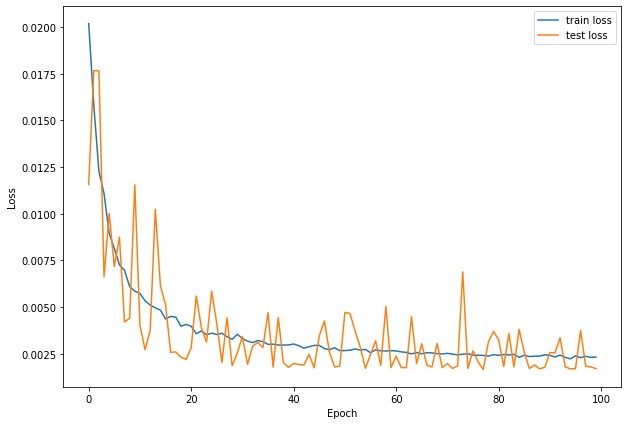

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

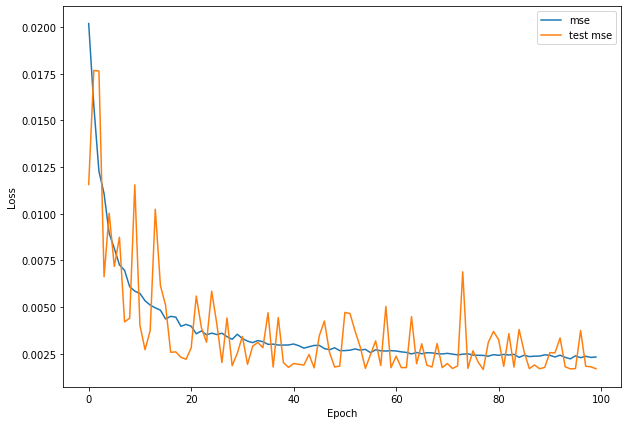

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()